a.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import precision_recall_fscore_support
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("Q1.csv")
df.head()

,Unnamed: 0,ID,uni,DS,ALG,ML,DL,DB,HW,OS,NTW,DSP,STandLAL,prj
0,0,974285.0,Shiraz UniVersity,4.613070,19.219966,13.777694,1.768949,12.918400,12.560763,17.544232,6.242864,1.286421,18.607406,57.462136
1,1,563921.0,NaN,NaN,10.416559,10.294882,10.370097,0.236130,9.978527,16.255803,11.639155,17.540606,0.664260,52.820606
2,2,308307.0,Isfahan University of Tecchnology,14.193912,19.516232,8.193591,9.325052,19.036204,9.339919,13.861366,14.092048,1.233343,9.441342,67.046251
3,3,NaN,Tabriz University,16.422105,9.990100,5.491504,7.267110,14.041443,8.326088,15.791592,8.534165,9.126567,6.920051,55.419282
4,4,570319.0,Shiraz UniVersity,13.732369,4.311718,8.025760,5.766623,8.488922,2.124606,4.632900,10.456614,7.636695,11.098141,43.273511


b.

In [3]:
# Check for missing values

missing_values = pd.DataFrame({'missing value count': df.isna().sum()})
missing_values

,missing value count
Unnamed: 0,0
ID,19
uni,36
DS,16
ALG,10
ML,1
DL,1
DB,1
HW,3
OS,24


In [4]:
# dropping university tuples
missing_tuples = df[df.uni.isnull()].index
df.drop(missing_tuples, axis = 0, inplace=True)

In [5]:
# dropping DS tuples
missing_tuples = df[df.DS.isnull()].index
df.drop(missing_tuples, axis = 0, inplace=True)

In [6]:
# dropping ALG tuples
missing_tuples = df[df.ALG.isnull()].index
df.drop(missing_tuples, axis = 0, inplace=True)

In [7]:
# dropping ML, DL, DB, HW, OS, NTW, DSP, prj, STandLAL tuples
missing_tuples = df[df.ML.isnull()].index
df.drop(missing_tuples, axis = 0, inplace=True)

missing_tuples = df[df.DL.isnull()].index
df.drop(missing_tuples, axis = 0, inplace=True)

missing_tuples = df[df.DB.isnull()].index
df.drop(missing_tuples, axis = 0, inplace=True)

missing_tuples = df[df.HW.isnull()].index
df.drop(missing_tuples, axis = 0, inplace=True)

missing_tuples = df[df.OS.isnull()].index
df.drop(missing_tuples, axis = 0, inplace=True)

missing_tuples = df[df.NTW.isnull()].index
df.drop(missing_tuples, axis = 0, inplace=True)

missing_tuples = df[df.DSP.isnull()].index
df.drop(missing_tuples, axis = 0, inplace=True)

missing_tuples = df[df.prj.isnull()].index
df.drop(missing_tuples, axis = 0, inplace=True)

missing_tuples = df[df.STandLAL.isnull()].index
df.drop(missing_tuples, axis = 0, inplace=True)

c.

In [8]:
# Dropping ID and Unnamed: 0 columns

df.drop(columns=['ID', 'Unnamed: 0'], inplace=True)

In [9]:
df.uni = df['uni'].str.lower()

In [10]:
df['uni'] = df['uni'].replace(['sut'], 'sharif university of technology')
df['uni'] = df['uni'].replace(['iut'], 'isfahan university of tecchnology')
df['uni'] = df['uni'].replace(['ut'], 'university of tehran')
df['uni'] = df['uni'].replace(['ferdowsi univesity'], 'ferdowsi university')

In [11]:
categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,uni,DS,ALG,ML,DL,DB,HW,OS,NTW,DSP,STandLAL,prj
0,6,4.613070,19.219966,13.777694,1.768949,12.918400,12.560763,17.544232,6.242864,1.286421,18.607406,57.462136
2,3,14.193912,19.516232,8.193591,9.325052,19.036204,9.339919,13.861366,14.092048,1.233343,9.441342,67.046251
3,7,16.422105,9.990100,5.491504,7.267110,14.041443,8.326088,15.791592,8.534165,9.126567,6.920051,55.419282
4,6,13.732369,4.311718,8.025760,5.766623,8.488922,2.124606,4.632900,10.456614,7.636695,11.098141,43.273511
6,8,12.627720,17.081490,2.486638,10.361988,11.640996,11.085180,17.306854,7.883087,17.600587,18.884534,64.087750


d.

In [12]:
df.describe()

,uni,DS,ALG,ML,DL,DB,HW,OS,NTW,DSP,STandLAL,prj
count,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,5.069945,9.995207,10.044200,9.800999,9.766902,10.319046,10.204428,10.101166,10.069689,9.951115,10.360928,56.388549
std,2.326595,5.731800,5.826290,5.703610,5.855642,5.857843,7.566368,6.873874,5.631195,5.756028,5.791537,11.522999
min,0.000000,0.011261,0.055391,0.028951,0.020001,0.000727,-7.390506,-17.611152,0.013312,0.012463,0.013459,17.717730
25%,3.000000,5.081457,5.040771,4.984407,4.835035,5.326907,5.130636,5.058178,5.406178,5.110303,5.264572,48.389906
50%,6.000000,10.022238,9.926055,9.851798,9.725941,10.087395,9.794095,10.335979,10.097890,9.851861,10.222342,56.201281
75%,7.000000,14.858347,15.099152,14.499090,14.413309,15.564909,15.123588,15.090184,15.083018,15.047385,15.422406,63.845680
max,10.000000,19.974687,19.931012,19.971160,55.236815,19.997719,114.879538,113.497786,19.934011,19.927692,19.941939,91.853542


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 0 to 999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   uni       915 non-null    int32  
 1   DS        915 non-null    float64
 2   ALG       915 non-null    float64
 3   ML        915 non-null    float64
 4   DL        915 non-null    float64
 5   DB        915 non-null    float64
 6   HW        915 non-null    float64
 7   OS        915 non-null    float64
 8   NTW       915 non-null    float64
 9   DSP       915 non-null    float64
 10  STandLAL  915 non-null    float64
 11  prj       915 non-null    float64
dtypes: float64(11), int32(1)
memory usage: 89.4 KB


In [14]:
df.shape

(915, 12)

In [15]:
# Handling outliers

outlier = df[df.OS > 20].index
df.drop(outlier, axis = 0, inplace=True)

outlier = df[df.DL > 20].index
df.drop(outlier, axis = 0, inplace=True)

outlier = df[df.HW > 20].index
df.drop(outlier, axis = 0, inplace=True)

outlier = df[df.OS < 0].index
df.drop(outlier, axis = 0, inplace=True)

outlier = df[df.HW < 0].index
df.drop(outlier, axis = 0, inplace=True)

In [16]:
df.shape

(905, 12)

<AxesSubplot:xlabel='uni', ylabel='count'>

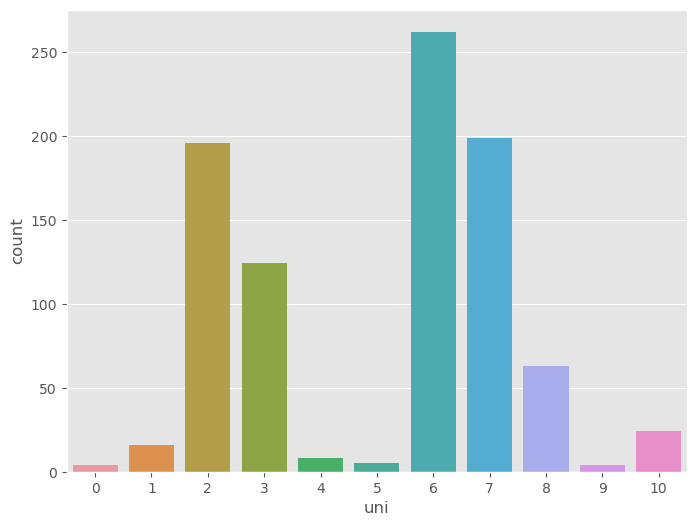

In [17]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df["uni"])

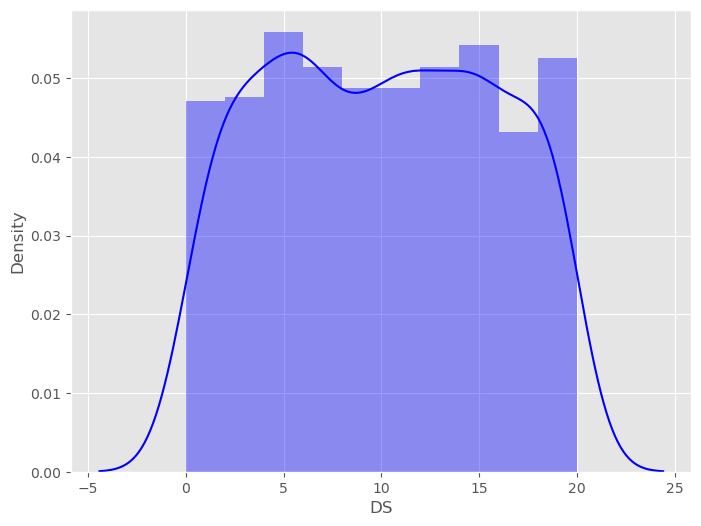

Mean: 9.990165734892988


In [18]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["DS"], color="b")
plt.show()

mean = df['DS'].mean()
print(f'Mean: {mean}')

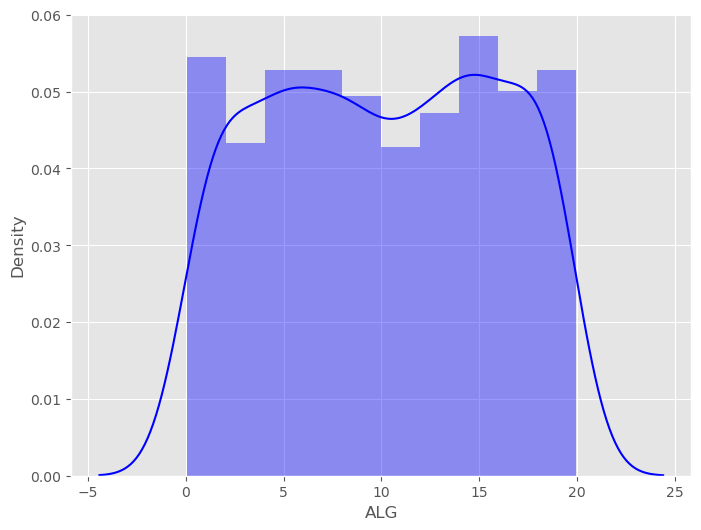

Mean: 10.057446162526196


In [19]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["ALG"], color="b")
plt.show()

mean = df['ALG'].mean()
print(f'Mean: {mean}')

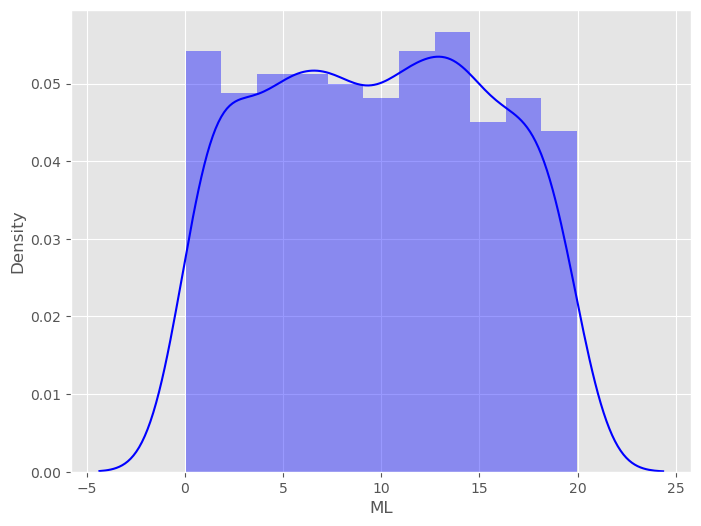

Mean: 9.782052699423902


In [20]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["ML"], color="b")
plt.show()

mean = df['ML'].mean()
print(f'Mean: {mean}')

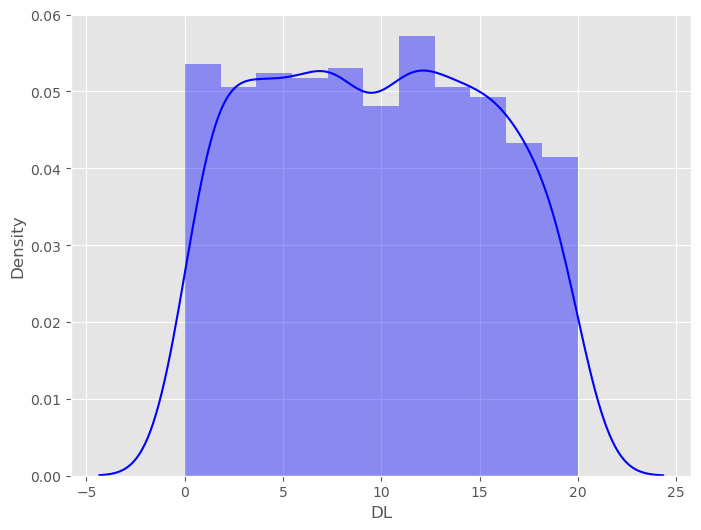

Mean: 9.673277772501324


In [21]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["DL"], color="b")
plt.show()

mean = df['DL'].mean()
print(f'Mean: {mean}')

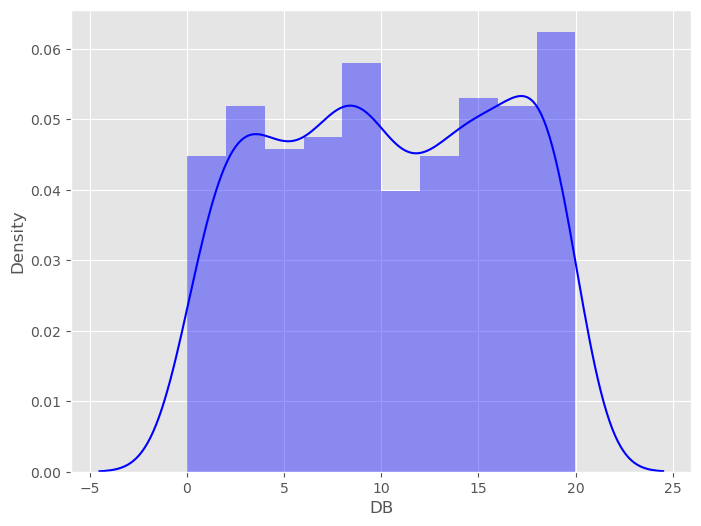

Mean: 10.32697978862225


In [22]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["DB"], color="b")
plt.show()

mean = df['DB'].mean()
print(f'Mean: {mean}')

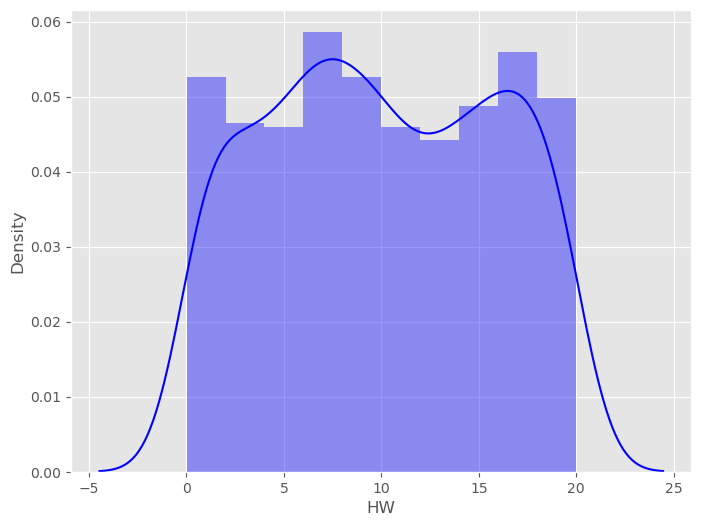

Mean: 10.007795777390653


In [23]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["HW"], color="b")
plt.show()

mean = df['HW'].mean()
print(f'Mean: {mean}')

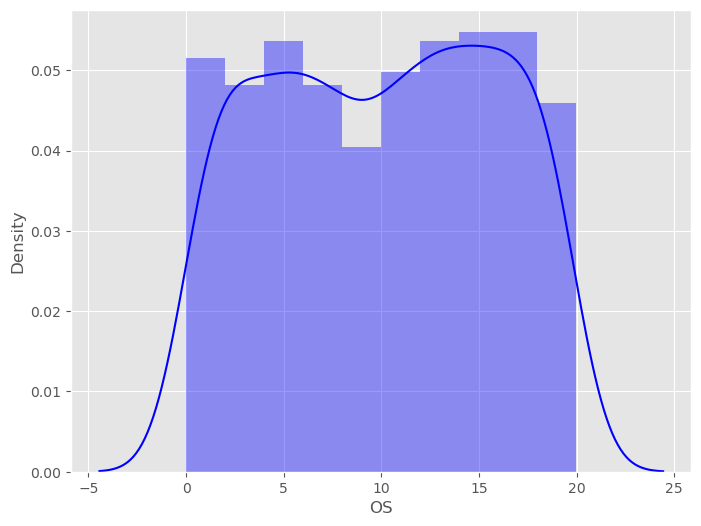

Mean: 10.020271353805155


In [24]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["OS"], color="b")
plt.show()

mean = df['OS'].mean()
print(f'Mean: {mean}')

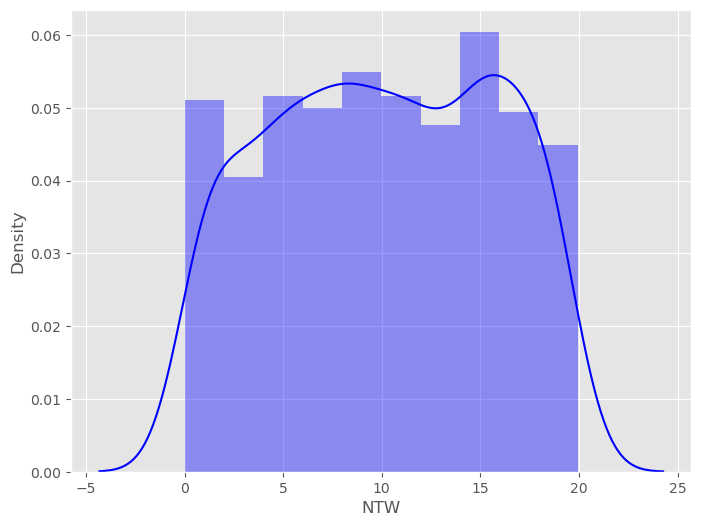

Mean: 10.058174471435605


In [25]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["NTW"], color="b")
plt.show()

mean = df['NTW'].mean()
print(f'Mean: {mean}')

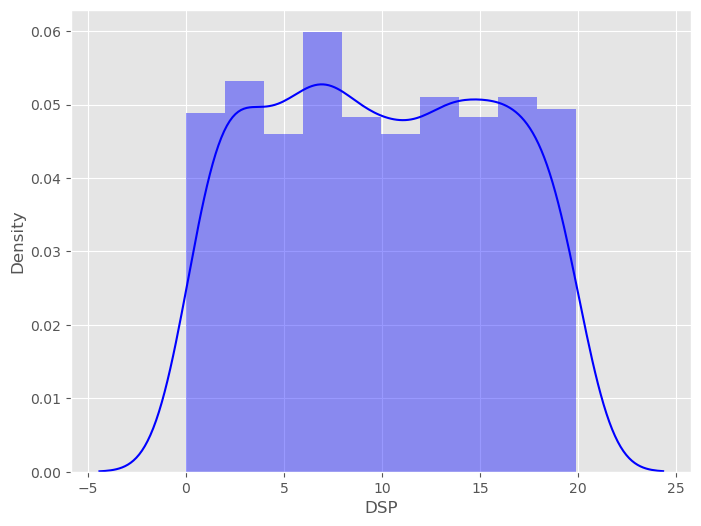

Mean: 9.954009839837685


In [26]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["DSP"], color="b")
plt.show()

mean = df['DSP'].mean()
print(f'Mean: {mean}')

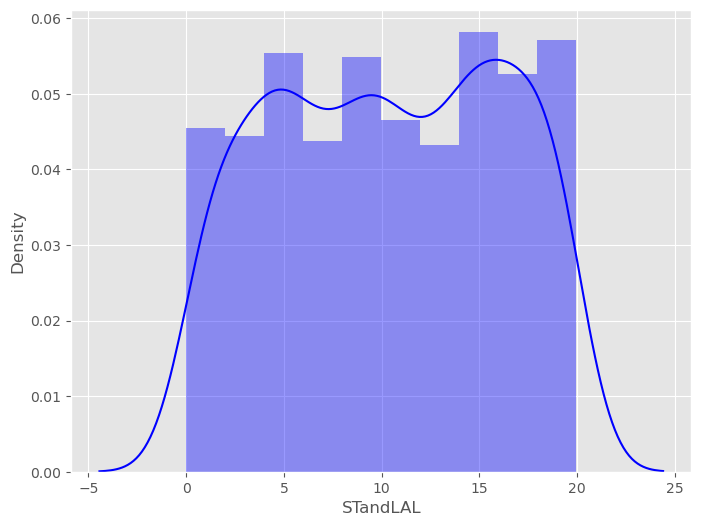

Mean: 10.34077355668286


In [27]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["STandLAL"], color="b")
plt.show()

mean = df['STandLAL'].mean()
print(f'Mean: {mean}')

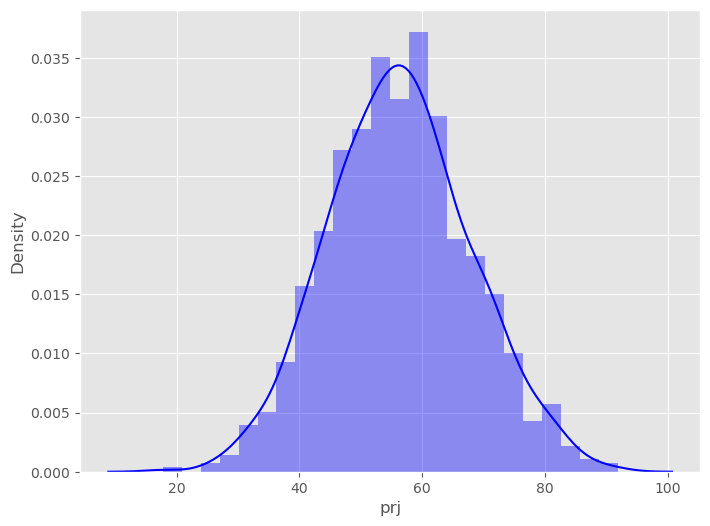

Mean: 56.333810396464315


In [28]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["prj"], color="b")
plt.show()

mean = df['prj'].mean()
print(f'Mean: {mean}')

e.

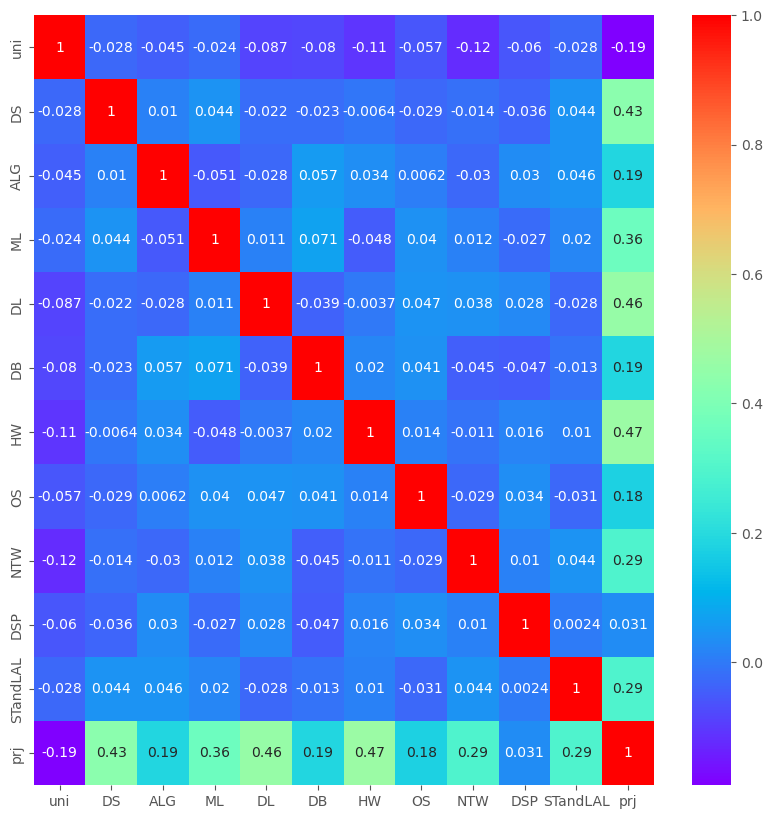

In [29]:
# Correlation Matrix

correlation_mat = df.corr()
corr_features = correlation_mat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(df[corr_features].corr(),annot=True,cmap='rainbow')
plt.show()

f.

In [30]:
# Shuffling the Data Set

df = shuffle(df)

In [31]:
X = df.drop("prj", axis=1)
X.head()

,uni,DS,ALG,ML,DL,DB,HW,OS,NTW,DSP,STandLAL
182,6,9.488361,14.847248,11.450380,2.042644,18.135899,5.540089,0.449867,7.516261,16.249702,7.437657
338,6,13.850744,17.435472,17.493306,4.268822,6.122965,14.396671,0.679235,1.099998,4.673547,7.087724
9,6,1.761572,7.784512,11.652075,4.378103,16.202223,0.703833,8.276810,18.402699,2.027687,17.001804
238,6,6.222985,14.587725,5.620162,18.807502,16.456493,3.996786,7.252285,17.632966,11.285024,8.787228
135,6,4.566019,0.586123,8.182174,10.786399,12.762754,13.200068,11.929007,15.815885,7.830705,7.242566


In [32]:
y = df["prj"]
y.head()

182    44.612431
338    55.087806
9      45.325257
238    59.920683
135    54.277944
Name: prj, dtype: float64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=98)

In [34]:
# Check the shape of X_train and X_test

X_train.shape, X_test.shape

((724, 11), (181, 11))

In [35]:
# Feature scaling

X_train.describe()

,uni,DS,ALG,ML,DL,DB,HW,OS,NTW,DSP,STandLAL
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,5.023481,10.161949,10.163057,9.833531,9.614757,10.400643,10.061004,10.061884,9.984372,9.887268,10.409266
std,2.330447,5.727800,5.854521,5.665660,5.701895,5.879783,5.758439,5.782362,5.656332,5.704878,5.805888
min,0.000000,0.011261,0.055391,0.028951,0.020001,0.000727,0.009763,0.012460,0.038381,0.012463,0.013459
25%,3.000000,5.445272,4.957600,5.118735,4.680078,5.347696,5.453177,5.201936,5.059477,5.019484,5.346453
50%,6.000000,10.077490,10.103432,9.938516,9.489885,10.167977,9.780411,10.373245,10.026527,9.811756,10.449887
75%,7.000000,15.046654,15.227826,14.497366,14.313912,15.587071,15.096199,15.026028,14.989157,15.004536,15.497330
max,10.000000,19.974687,19.931012,19.971160,19.980380,19.997719,19.978809,19.962683,19.934011,19.878628,19.941939


In [36]:
sc = StandardScaler()
scaler = sc.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

g.

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)
LinearRegressionScore = lr.score(X_test,y_test)
LinearRegressionScore

1.0

In [38]:
# Check for overfitting and underfitting

print("score on train data: ", lr.score(X_train, y_train))
print("score on test data: ", lr.score(X_test, y_test))

score on train data:  1.0
score on test data:  1.0


In [39]:
# Discretization process

y_pred_test_disc = pd.qcut(y_pred_test, q=10, precision=0, labels=False)
y_test_disc = pd.qcut(y_test, q=10, precision=0, labels=False)

<AxesSubplot:>

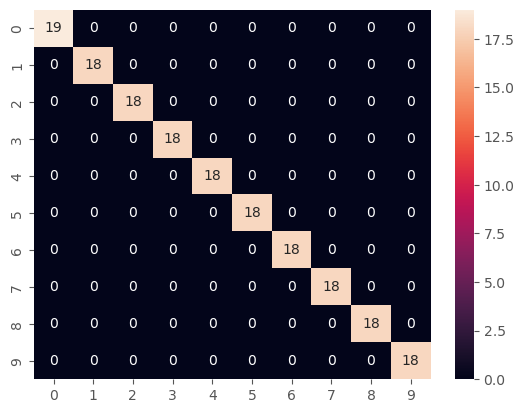

In [40]:
# Print the Confusion Matrix

cm = confusion_matrix(y_test_disc, y_pred_test_disc)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d')

In [41]:
print(classification_report(y_test_disc, y_pred_test_disc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        18

    accuracy                           1.00       181
   macro avg       1.00      1.00      1.00       181
weighted avg       1.00      1.00      1.00       181



In [42]:
precision_recall_fscore_support(y_test_disc, y_pred_test_disc, average='micro')

(1.0, 1.0, 1.0, None)

In [43]:
print('Mean Absolute Error: %0.15f' % metrics.mean_absolute_error(y_test, y_pred_test))  
print('Mean Squared Error: %0.30f' % metrics.mean_squared_error(y_test, y_pred_test))  
print('Root Mean Squared Error: %0.15f'% np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Mean Absolute Error: 0.000000000000042
Mean Squared Error: 0.000000000000000000000000002787
Root Mean Squared Error: 0.000000000000053


In [44]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(270, 230), max_iter = 300, activation = 'tanh', solver='adam', random_state=98)
mlp_reg.fit(X_train, y_train)
ypred = mlp_reg.predict(X_test)
MLPRegressorScore = mlp_reg.score(X_test, y_test)
MLPRegressorScore

0.9866430859944815

In [45]:
# Check for overfitting and underfitting

predictions_train = mlp_reg.predict(X_train)
train_score = mlp_reg.score(X_train, y_train)
print("score on train data: ", train_score)
predictions_test = mlp_reg.predict(X_test)
test_score = mlp_reg.score(X_test, y_test)
print("score on test data: ", test_score)

score on train data:  0.9863540241068223
score on test data:  0.9866430859944815


In [46]:
# Discretization process

y_pred_test_disc = pd.qcut(ypred, q=10, precision=0, labels=False)
y_test_disc = pd.qcut(y_test, q=10, precision=0, labels=False)

<AxesSubplot:>

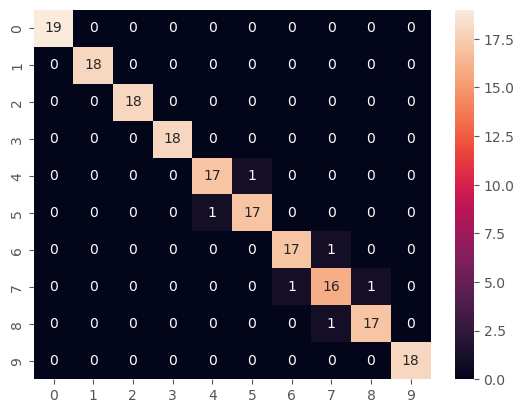

In [47]:
# Print the Confusion Matrix

cm = confusion_matrix(y_test_disc, y_pred_test_disc)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d')

In [48]:
print(classification_report(y_test_disc, y_pred_test_disc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       0.94      0.94      0.94        18
           5       0.94      0.94      0.94        18
           6       0.94      0.94      0.94        18
           7       0.89      0.89      0.89        18
           8       0.94      0.94      0.94        18
           9       1.00      1.00      1.00        18

    accuracy                           0.97       181
   macro avg       0.97      0.97      0.97       181
weighted avg       0.97      0.97      0.97       181



In [49]:
precision_recall_fscore_support(y_test_disc, y_pred_test_disc, average='micro')

(0.9668508287292817, 0.9668508287292817, 0.9668508287292819, None)

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

Mean Absolute Error: 0.5583226290610795
Mean Squared Error: 1.7575161998562734
Root Mean Squared Error: 1.3257134682337182


In [51]:
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': ypred})
df_temp.head()

,Actual,Predicted
520,83.130302,76.252627
744,48.461998,48.640305
845,42.711618,43.140878
500,57.947437,57.989265
758,64.772139,64.990690


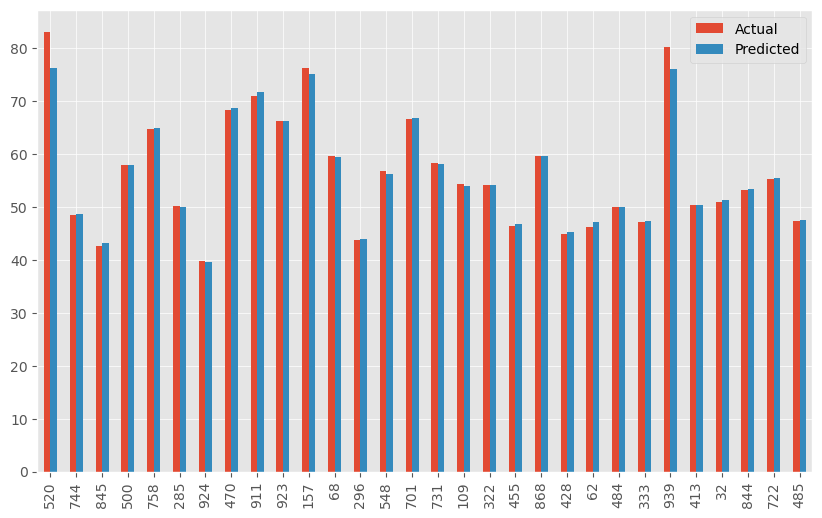

In [52]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

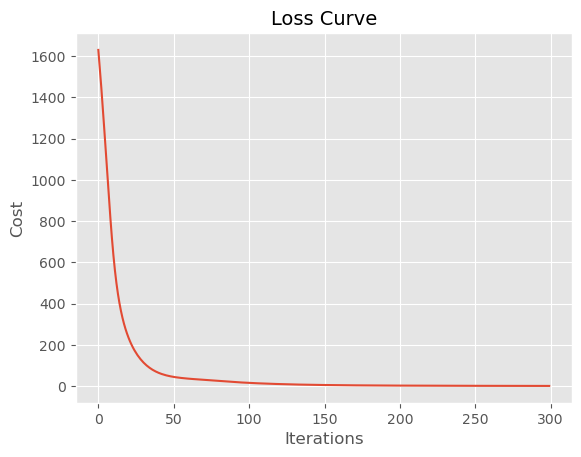

In [53]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Text(0, 0.5, 'Model Accuracy')

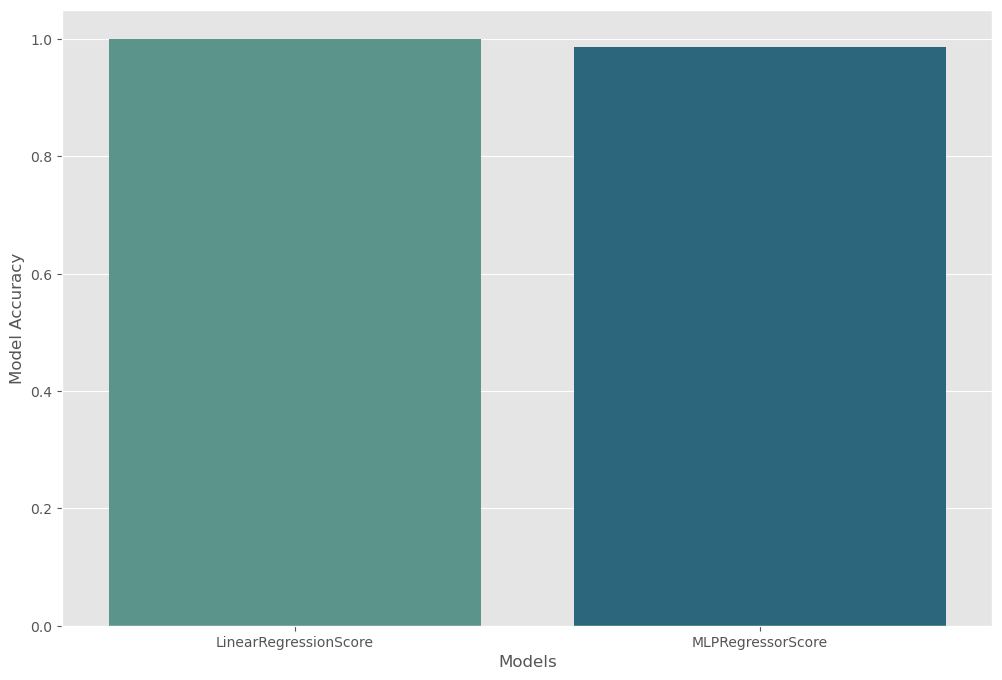

In [54]:
plt.style.use("ggplot")
x = ["LinearRegressionScore", "MLPRegressorScore"]

y = [LinearRegressionScore, MLPRegressorScore]

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=x,y=y, palette="crest");
plt.xlabel("Models")
plt.ylabel("Model Accuracy")